In [1]:
import pandas as pd
import numpy as np
import lmfit
from sklearn.metrics import r2_score 
import scipy
from typing import Optional

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rc('font', family="serif")
plt.rc('axes', titlesize=11)

In [2]:
def score(Yreal: np.ndarray, Yfit: np.ndarray) -> dict:
    """ Score a set of pKa predictions. """
    delta = Yreal - Yfit
    mae = np.mean(np.abs(delta))
    rmse = np.sqrt(np.sum(delta ** 2) / len(delta))
    r, _ = scipy.stats.pearsonr(Yreal, Yfit)
    r2 = r ** 2
    tau, _ = scipy.stats.kendalltau(Yreal, Yfit)
    
    return {
        "MAE": f"{mae:5.2f}",
        "RMSE": f"{rmse:5.2f}",
        "r²": f"{r2:5.2f}",
        "τ": f"{tau:5.2f}",
        "N": f"{len(Yfit):5d}"
    }

def plot(
    df: pd.DataFrame, 
    title: Optional[str] = None,
    xmin: float = -2,
    xmax: float = 22,
    texth: float = 0.5,
    texth2: float = 1.5,
    textv: float = -0.5,
    path: Optional[str] = None
) -> None:
    """
    Plot pKa predictions from a .csv file, and print out fit metrics.
    
    ``title`` is the title of the image.
    
    ``xmin`` and ``xmax`` define the range of the X and Y axes.
    
    ``texth``, ``texth2``, & ``textv`` are used to format how the metrics are displayed.
    
    ``path`` dictates where the image should be saved (if anywhere).
    """
    f = plt.figure(figsize=(5,5))
    Y = df["pka"].to_numpy()
    Y_pred = df["pka (pred)"].to_numpy()

    # compute fit metrics
    metrics = score(Y, Y_pred)

    # plot actual points
    plt.scatter(Y_pred, Y, s=5, c="k", marker="o")
    plt.xlim(xmin, xmax)

    # plot line of ideality and ranges showing error
    xgrid = np.linspace(xmin, xmax, 1000)
    plt.plot(xgrid, xgrid, "--", lw=1, c="k", alpha=0.5)
    plt.fill_between(xgrid, xgrid - 2, xgrid + 2, color="b", alpha=0.05, label="0.5 pKa interval")
    plt.fill_between(xgrid, xgrid - 1, xgrid + 1, color="b", alpha=0.1, label="1.0 pKa interval")
    plt.fill_between(xgrid, xgrid - 0.5, xgrid + 0.5, color="b", alpha=0.15, label="2.0 pKa interval")
    
    # plot title, if desired
    if title is not None:
        plt.title(title)

    # plot legend and fit metrics
    plt.legend(loc="lower right", fontsize=9)
    col1 = [f"{k}" for k, v in metrics.items()]
    col2 = [f"{v}" for k, v in metrics.items()]
    plt.text(xmin+texth, xmax+textv, "\n".join(col1))
    plt.text(xmin+texth+texth2, xmax+textv, "\n".join(col2))
    
    # plot axis labels
    plt.ylabel("Experimental pKa")
    plt.xlabel("Predicted pKa")
    
    # save high-res image, if desired
    if path is not None:
        plt.savefig(path, dpi=300, bbox_inches="tight")
    
    plt.show()

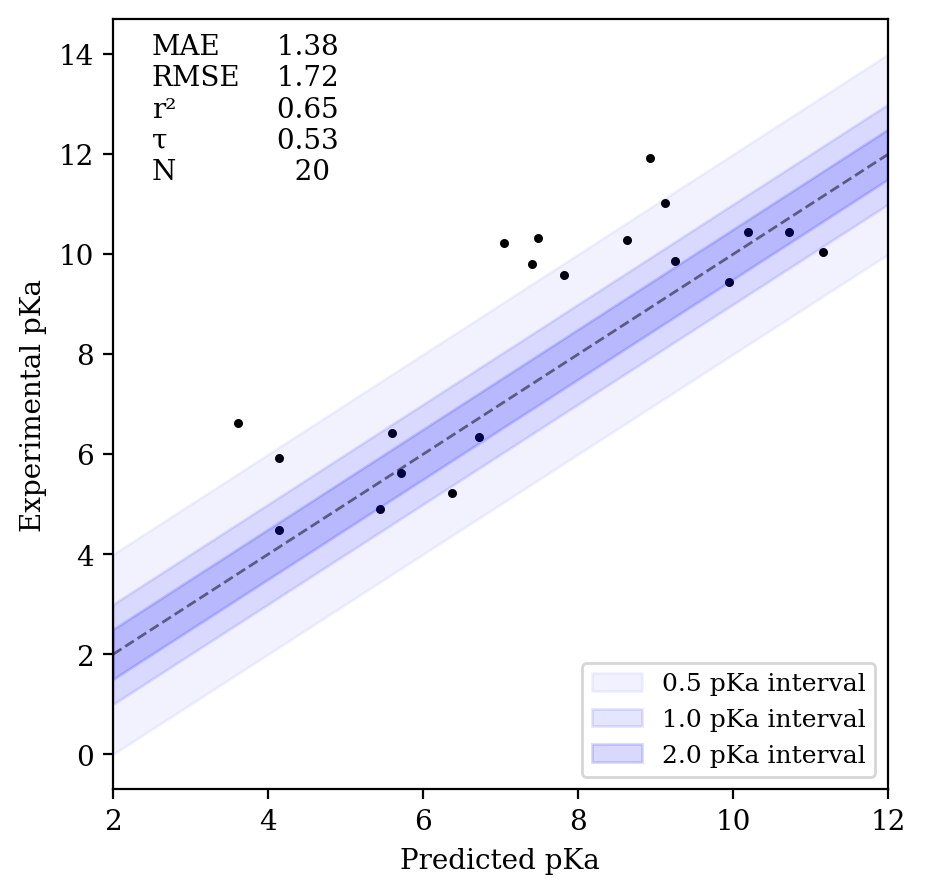

In [3]:
df = pd.read_csv("assays/SAMPL7.csv")
plot(df, None, 2, 12)

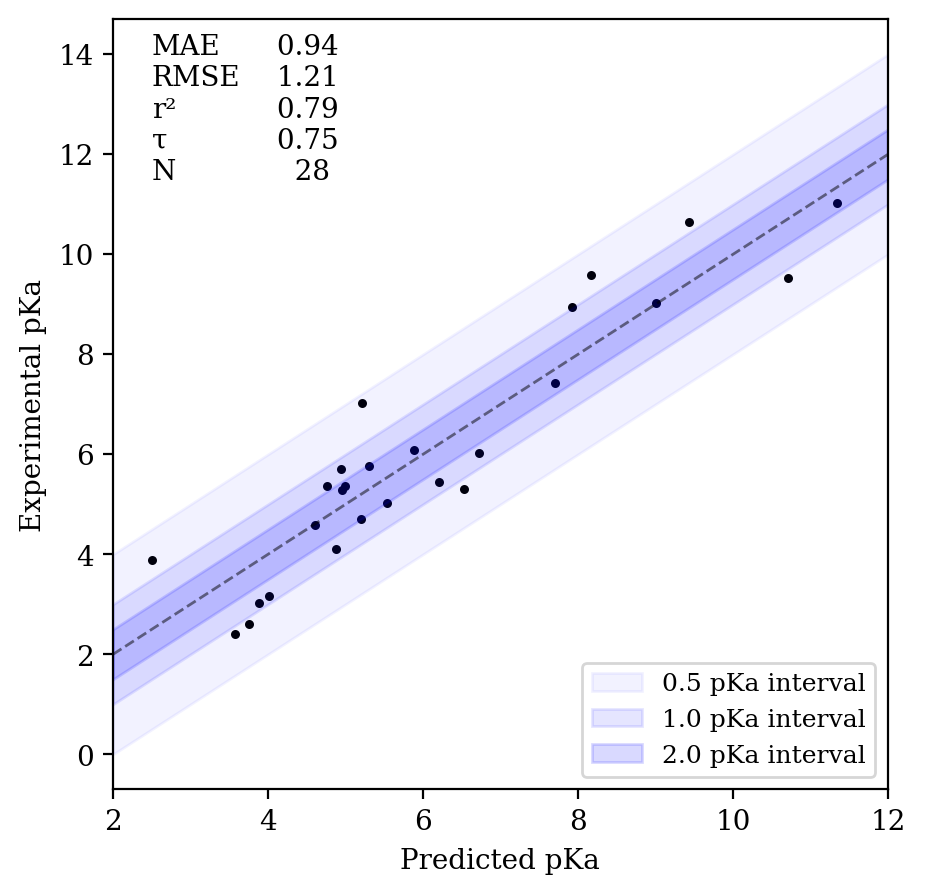

In [4]:
df = pd.read_csv("assays/SAMPL6.csv")
plot(df, None, 2, 12)

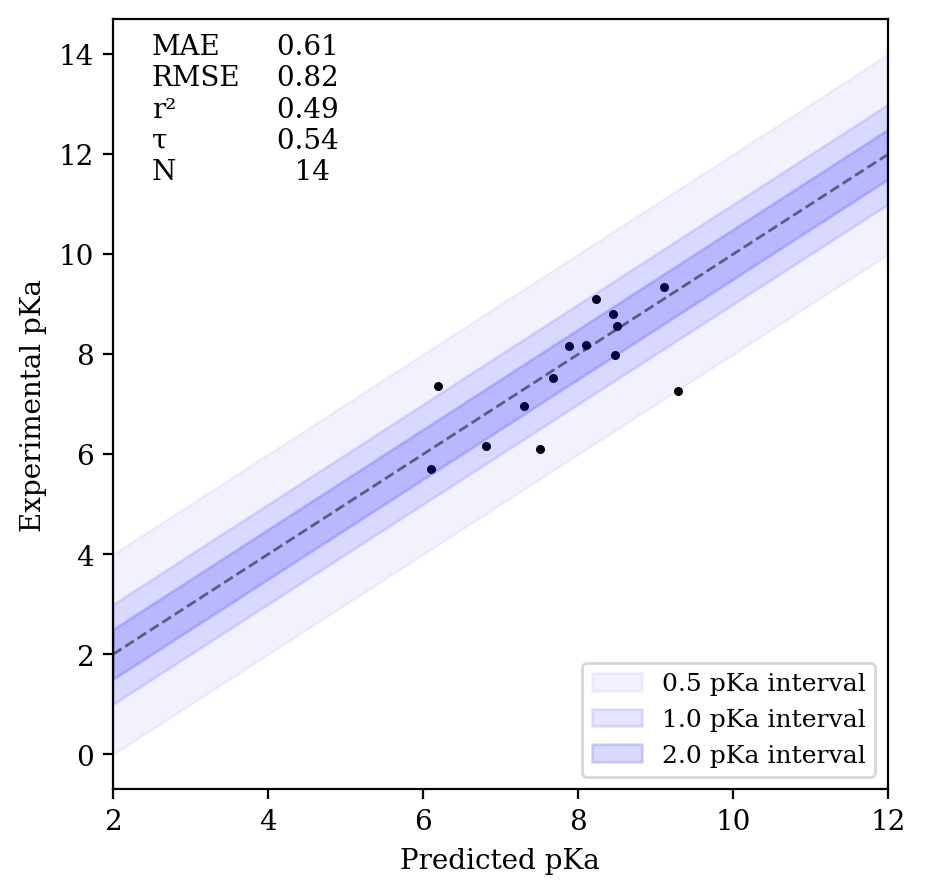

In [5]:
df = pd.read_csv("assays/di_kerns_folate.csv")
plot(df, None, 2, 12)

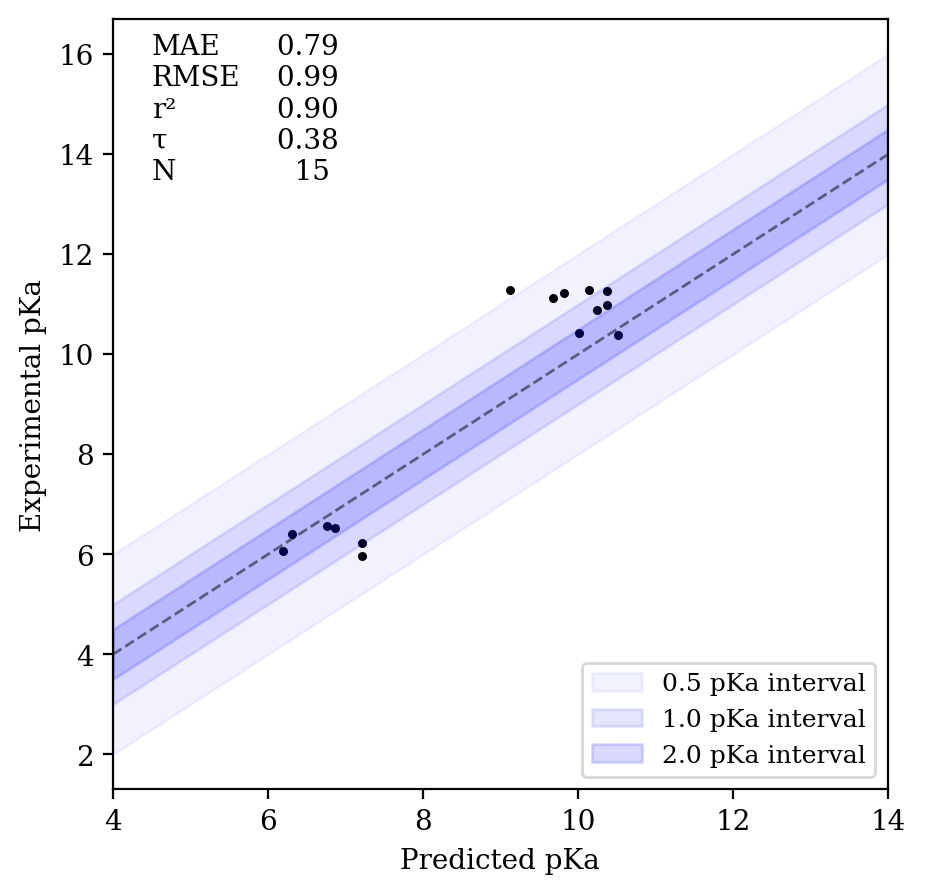

In [6]:
df = pd.read_csv("assays/enamine_aCF3_bicycles.csv")
plot(df, None, 4, 14)

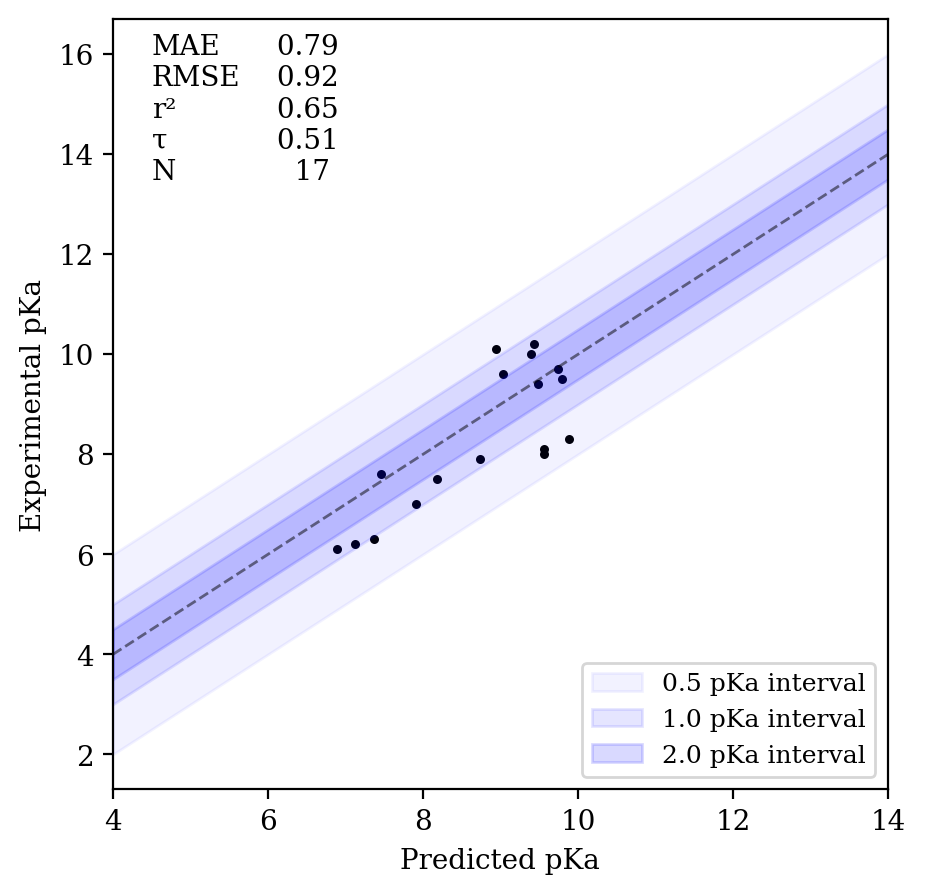

In [7]:
df = pd.read_csv("assays/amine_oxetane.csv")
plot(df, None, 4, 14)

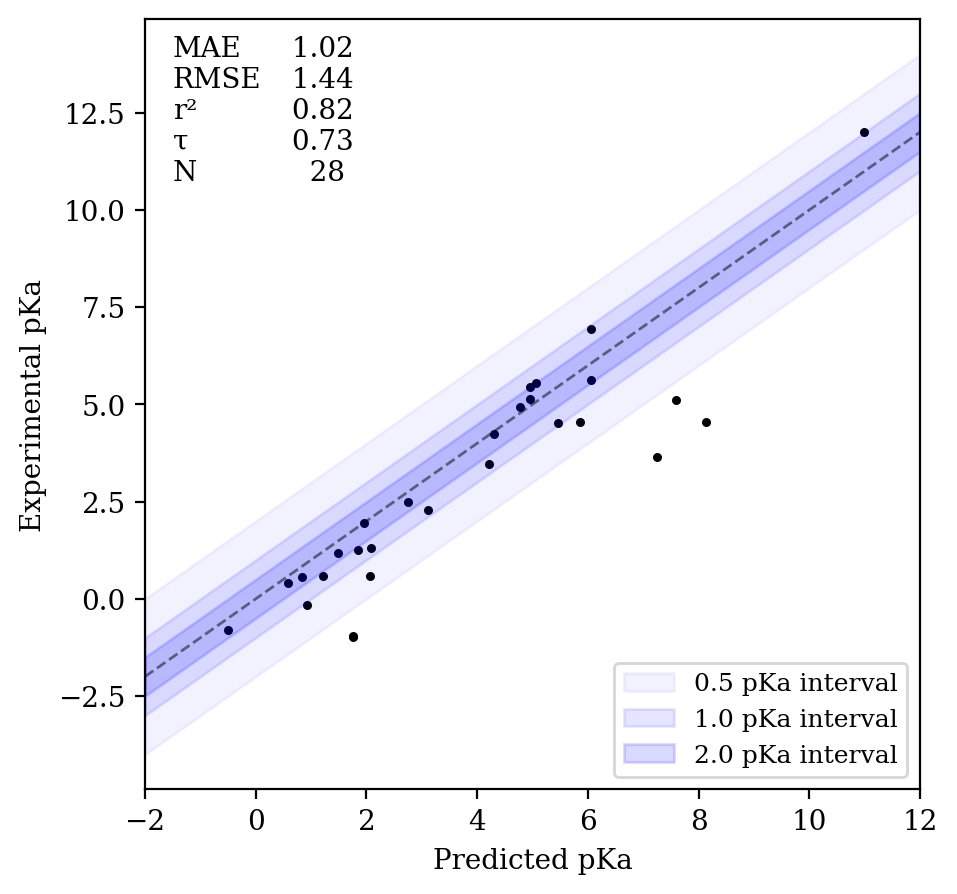

In [8]:
df = pd.read_csv("assays/ArN.csv")
plot(df, None, -2, 12, textv=-1.25, texth=0.5, texth2=2)

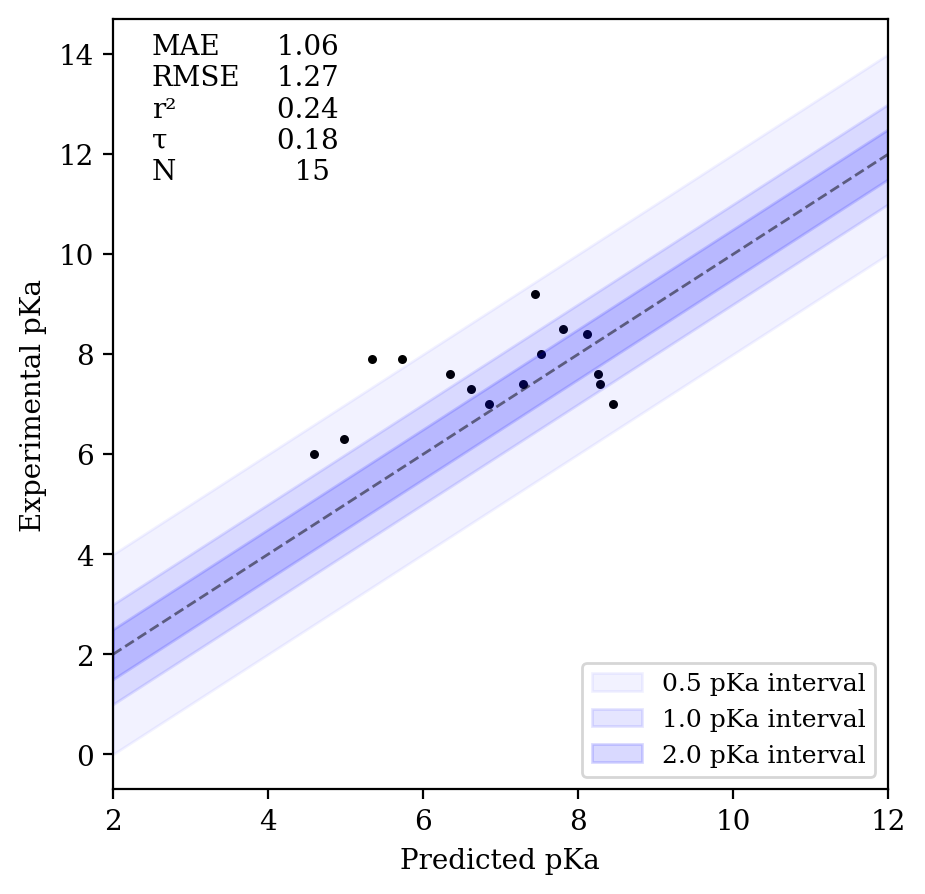

In [9]:
df = pd.read_csv("assays/bace.csv")
plot(df, None, 2, 12)

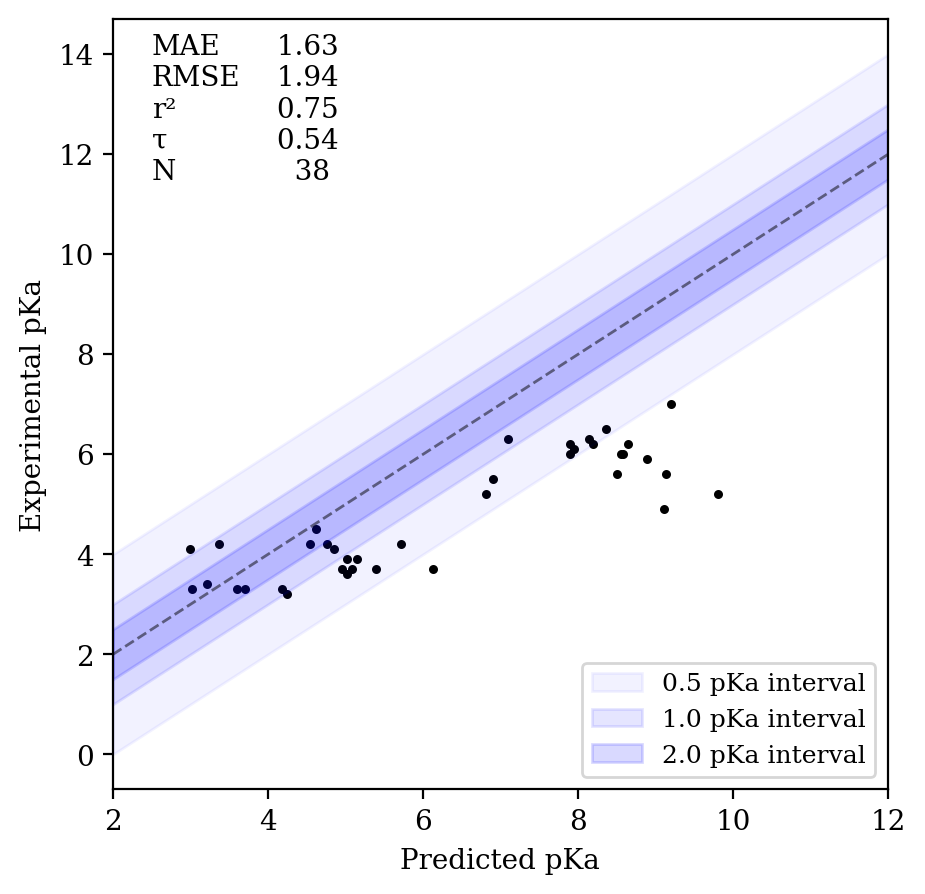

In [10]:
df = pd.read_csv("assays/TCT.csv")
plot(df, None, 2, 12)